# Exploratory Data Analysis: Bot-IoT Balanced Subset

Comprehensive EDA of the balanced Bot-IoT dataset (150,477 records) for paper writing.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Load data
file_path = "/Users/nawara/Desktop/LLM-Clustering-Paper/Bot-IoT-Dataset/bot_iot_balanced_subset_300k.csv"
df = pd.read_csv(file_path, low_memory=False)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset loaded successfully!
Shape: (150477, 46)
Memory usage: 112.89 MB


## 2. Dataset Overview

In [2]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nShape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nFirst few rows:")
print(df.head(3))

print(f"\n\nData Types:")
print(df.dtypes)

print(f"\n\nBasic Statistics:")
print(df.describe())

DATASET OVERVIEW

Shape: 150,477 rows × 46 columns

First few rows:
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0  1356849  1.528085e+09    e            1   udp             3   
1  1195765  1.528085e+09    e            1   udp             3   
2   106037  1.528081e+09  e g            5   tcp             1   

             saddr  sport          daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.150  18720  192.168.100.3    80  ...            0.520747   
1  192.168.100.147  10346  192.168.100.7    80  ...            0.248363   
2  192.168.100.150  16132  192.168.100.3    80  ...            0.228849   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 56                56            0.520747   
1                100               100            0.248366   
2                 76                76            0.229046   

   AR_P_Proto_P_Dport  Pkts_P_State_P_Protocol_P_DestIP  \
0            0.411862                               896   

## 3. Missing Values Analysis

In [3]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
if len(missing_df) == 0:
    print("✓ No missing values found in the dataset!")
else:
    print(missing_df)

Missing Values Summary:
✓ No missing values found in the dataset!


## 4. Label Distribution Analysis

In [4]:
print("="*80)
print("LABEL DISTRIBUTION")
print("="*80)

print("\n1. ATTACK (Binary - Normal vs Attack):")
attack_counts = df['attack'].value_counts()
attack_pct = df['attack'].value_counts(normalize=True) * 100
for label, count in attack_counts.items():
    print(f"   {label} ({'Normal' if label == 0 else 'Attack'}): {count:,} ({attack_pct[label]:.2f}%)")

print("\n2. CATEGORY Distribution:")
category_counts = df['category'].value_counts()
category_pct = df['category'].value_counts(normalize=True) * 100
for cat, count in category_counts.items():
    print(f"   {cat:20s}: {count:,} ({category_pct[cat]:6.2f}%)")

print("\n3. SUBCATEGORY Distribution (Top 10):")
subcat_counts = df['subcategory'].value_counts()
subcat_pct = df['subcategory'].value_counts(normalize=True) * 100
for subcat, count in subcat_counts.head(10).items():
    print(f"   {subcat:20s}: {count:,} ({subcat_pct[subcat]:6.2f}%)")

LABEL DISTRIBUTION

1. ATTACK (Binary - Normal vs Attack):
   1 (Attack): 150,000 (99.68%)
   0 (Normal): 477 (0.32%)

2. CATEGORY Distribution:
   DDoS                : 78,855 ( 52.40%)
   DoS                 : 67,464 ( 44.83%)
   Reconnaissance      : 3,678 (  2.44%)
   Normal              : 477 (  0.32%)
   Theft               : 3 (  0.00%)

3. SUBCATEGORY Distribution (Top 10):
   UDP                 : 81,307 ( 54.03%)
   TCP                 : 64,903 ( 43.13%)
   Service_Scan        : 2,947 (  1.96%)
   OS_Fingerprint      : 731 (  0.49%)
   Normal              : 477 (  0.32%)
   HTTP                : 109 (  0.07%)
   Keylogging          : 3 (  0.00%)


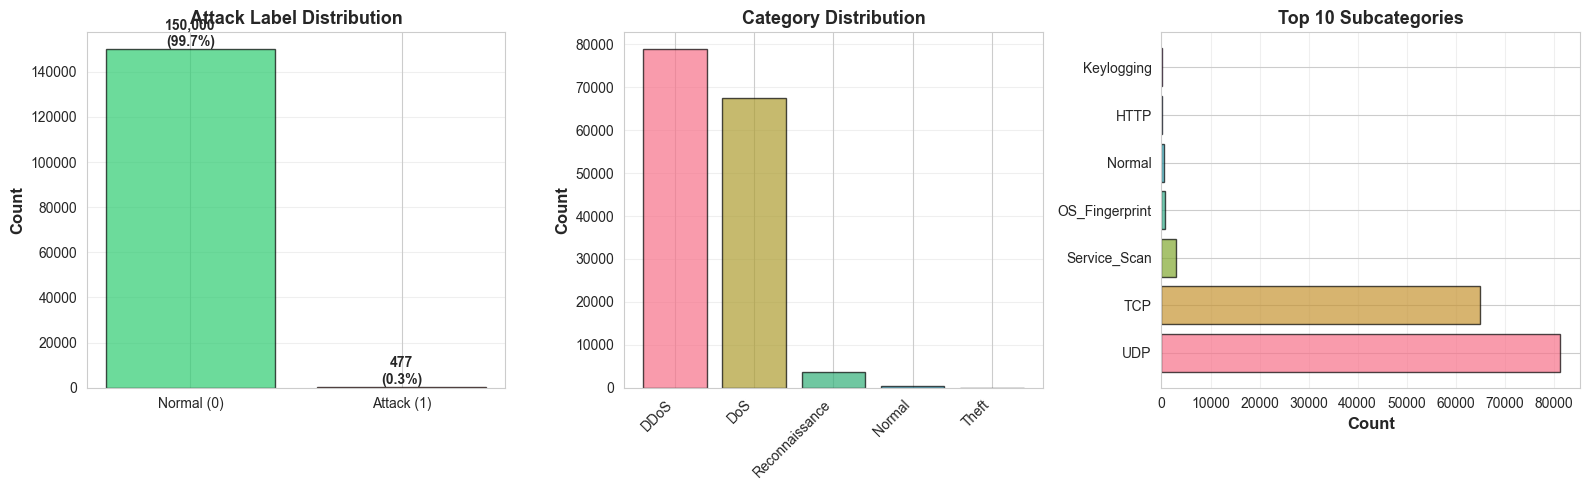

✓ Label distribution plot saved!


In [5]:
# Visualize label distributions
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Attack distribution
attack_data = df['attack'].value_counts()
colors_attack = ['#2ecc71', '#e74c3c']
axes[0].bar(['Normal (0)', 'Attack (1)'], attack_data.values, color=colors_attack, alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0].set_title('Attack Label Distribution', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(attack_data.values):
    axes[0].text(i, v, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Category distribution
category_data = df['category'].value_counts()
colors_cat = sns.color_palette('husl', len(category_data))
axes[1].bar(range(len(category_data)), category_data.values, color=colors_cat, alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(len(category_data)))
axes[1].set_xticklabels(category_data.index, rotation=45, ha='right')
axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[1].set_title('Category Distribution', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Subcategory distribution (top 10)
subcat_data = df['subcategory'].value_counts().head(10)
colors_subcat = sns.color_palette('husl', len(subcat_data))
axes[2].barh(range(len(subcat_data)), subcat_data.values, color=colors_subcat, alpha=0.7, edgecolor='black')
axes[2].set_yticks(range(len(subcat_data)))
axes[2].set_yticklabels(subcat_data.index)
axes[2].set_xlabel('Count', fontsize=12, fontweight='bold')
axes[2].set_title('Top 10 Subcategories', fontsize=13, fontweight='bold')
axes[2].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/nawara/Desktop/LLM-Clustering-Paper/EDA_label_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Label distribution plot saved!")

## 5. Numeric Features Analysis

In [6]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns ({len(numeric_cols)}): {numeric_cols}")

# Detailed statistics
print("\n" + "="*80)
print("DETAILED NUMERIC STATISTICS")
print("="*80)
print(df[numeric_cols].describe().T)


Numeric columns (37): ['pkSeqID', 'stime', 'flgs_number', 'proto_number', 'pkts', 'bytes', 'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 'attack']

DETAILED NUMERIC STATISTICS
                                     count          mean           std  \
pkSeqID                           150477.0  1.841398e+06  1.062659e+06   
stime                             150477.0  1.528046e+09  2.726475e+05   
flgs_number                       150477.0  1.486779e+00  8.638047e-01   
proto_number                      150477.0  2.101863e+00  9.984725e-01   
pkts                              150477.0  1.490105e+01  5.695215e+0

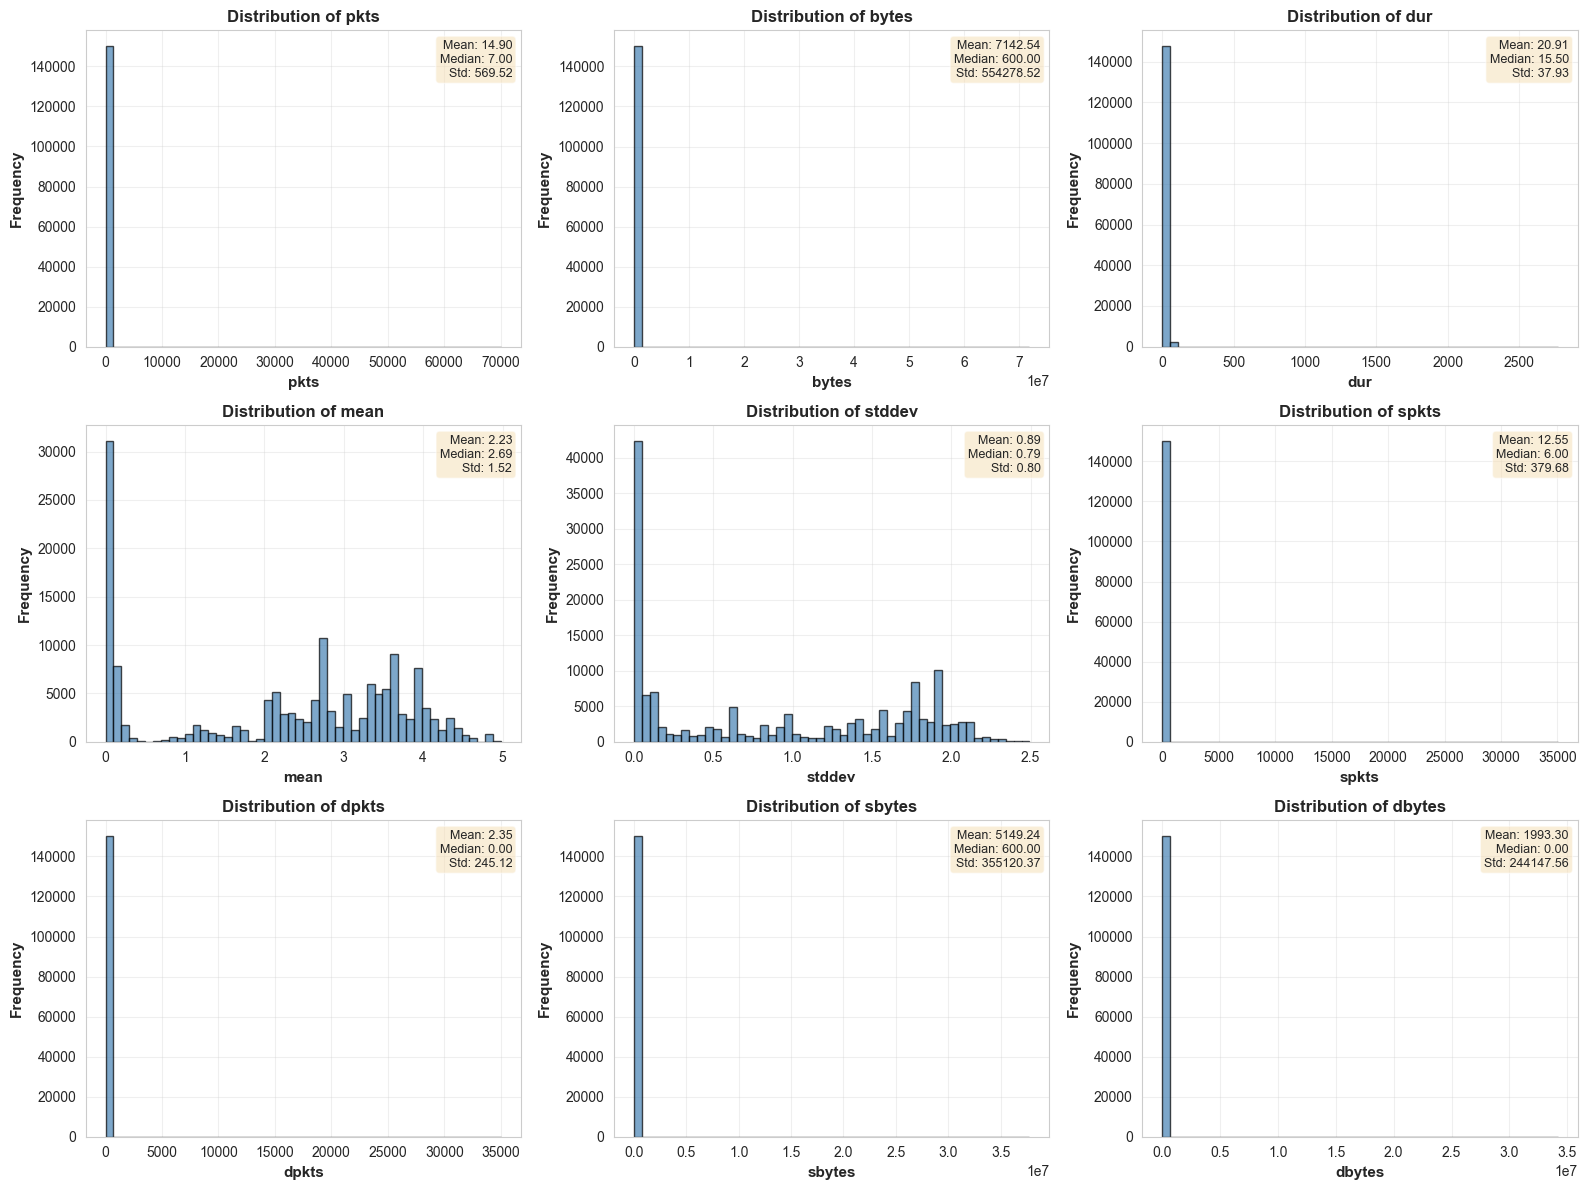

✓ Numeric features distribution plot saved!


In [7]:
# Distribution of key numeric features
key_features = ['pkts', 'bytes', 'dur', 'mean', 'stddev', 'spkts', 'dpkts', 'sbytes', 'dbytes']
existing_features = [f for f in key_features if f in numeric_cols]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(existing_features):
    ax = axes[idx]
    
    # Histogram with KDE
    ax.hist(df[feature], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_xlabel(feature, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
    ax.set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # Add statistics
    stats_text = f"Mean: {df[feature].mean():.2f}\nMedian: {df[feature].median():.2f}\nStd: {df[feature].std():.2f}"
    ax.text(0.98, 0.97, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide unused subplots
for idx in range(len(existing_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('/Users/nawara/Desktop/LLM-Clustering-Paper/EDA_numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Numeric features distribution plot saved!")

## 6. Categorical Features Analysis

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical columns: {categorical_cols}")

print("\n" + "="*80)
print("CATEGORICAL FEATURES STATISTICS")
print("="*80)

for col in categorical_cols:
    print(f"\n{col.upper()} - {df[col].nunique()} unique values:")
    print(df[col].value_counts())
    print("-" * 40)


Categorical columns: ['flgs', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'state', 'category', 'subcategory']

CATEGORICAL FEATURES STATISTICS

FLGS - 8 unique values:
flgs
e        94486
e s      50697
e g       3821
eU        1420
e *         37
e d         10
e &          5
e   t        1
Name: count, dtype: int64
----------------------------------------

PROTO - 5 unique values:
proto
udp          82313
tcp          67737
icmp           364
arp             55
ipv6-icmp        8
Name: count, dtype: int64
----------------------------------------

SADDR - 21 unique values:
saddr
192.168.100.147              38900
192.168.100.148              37937
192.168.100.150              36522
192.168.100.149              36293
192.168.100.3                  489
192.168.100.5                  211
192.168.100.6                   21
192.168.100.4                   19
192.168.100.1                   16
192.168.100.7                   15
192.168.100.46                  15
192.168.100.27            

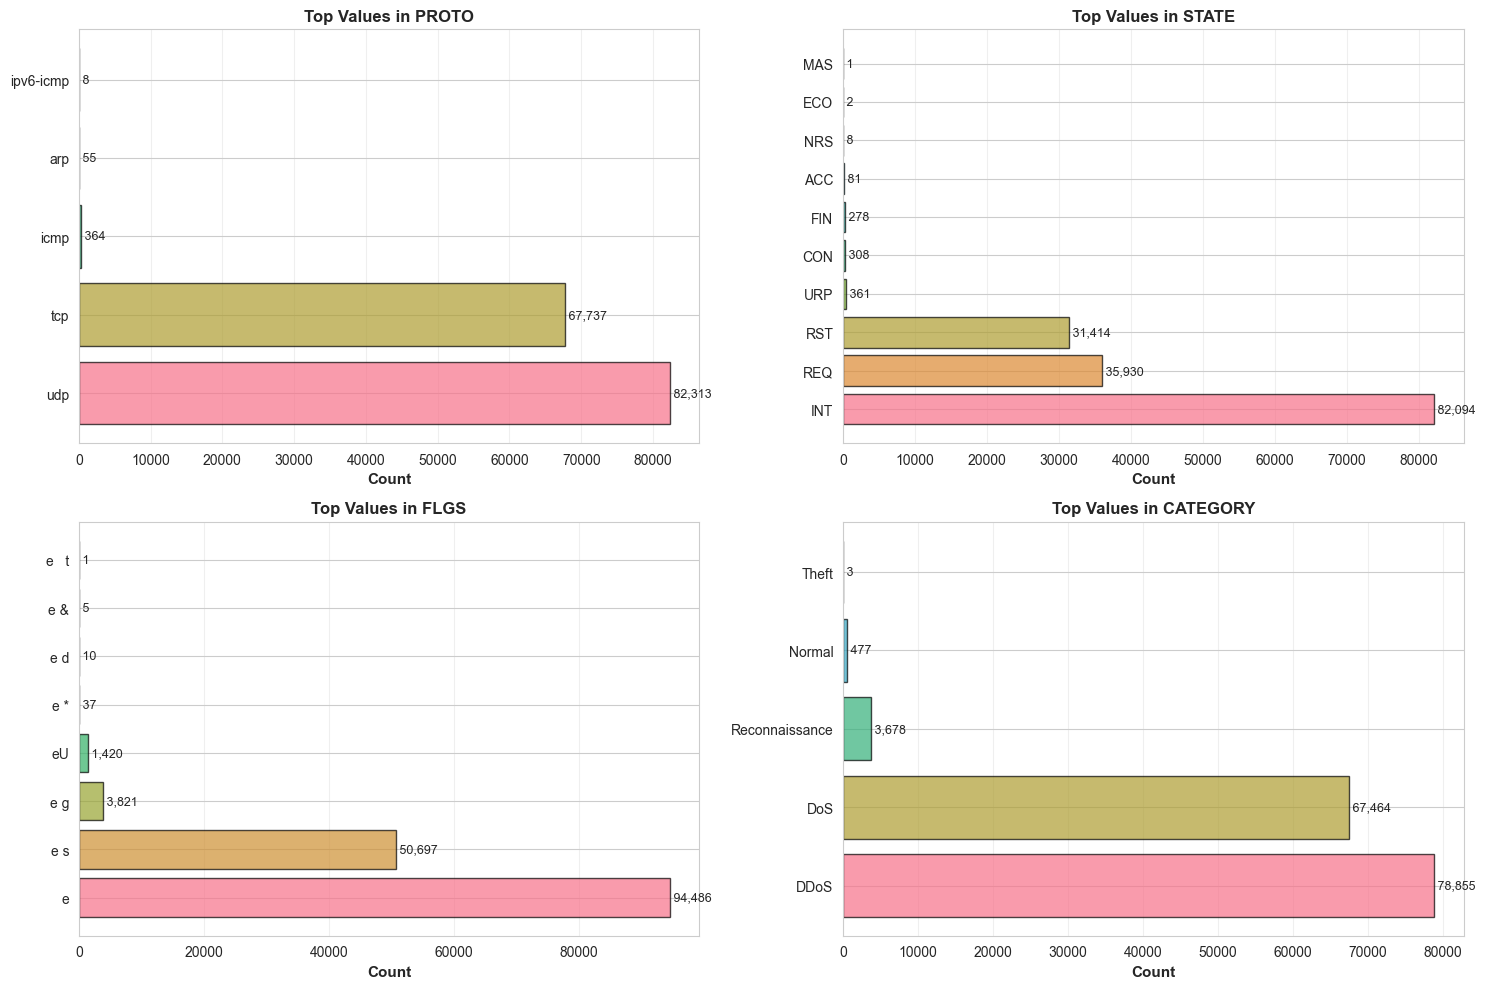

✓ Categorical features plot saved!


In [9]:
# Categorical feature distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

categorical_to_plot = ['proto', 'state', 'flgs', 'category']
categorical_to_plot = [c for c in categorical_to_plot if c in df.columns]

for idx, col in enumerate(categorical_to_plot):
    ax = axes[idx]
    data = df[col].value_counts().head(10)
    
    colors = sns.color_palette('husl', len(data))
    bars = ax.barh(range(len(data)), data.values, color=colors, alpha=0.7, edgecolor='black')
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index, fontsize=10)
    ax.set_xlabel('Count', fontsize=11, fontweight='bold')
    ax.set_title(f'Top Values in {col.upper()}', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(data.values):
        ax.text(v, i, f' {v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.savefig('/Users/nawara/Desktop/LLM-Clustering-Paper/EDA_categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Categorical features plot saved!")

## 7. Attack vs Normal Comparison

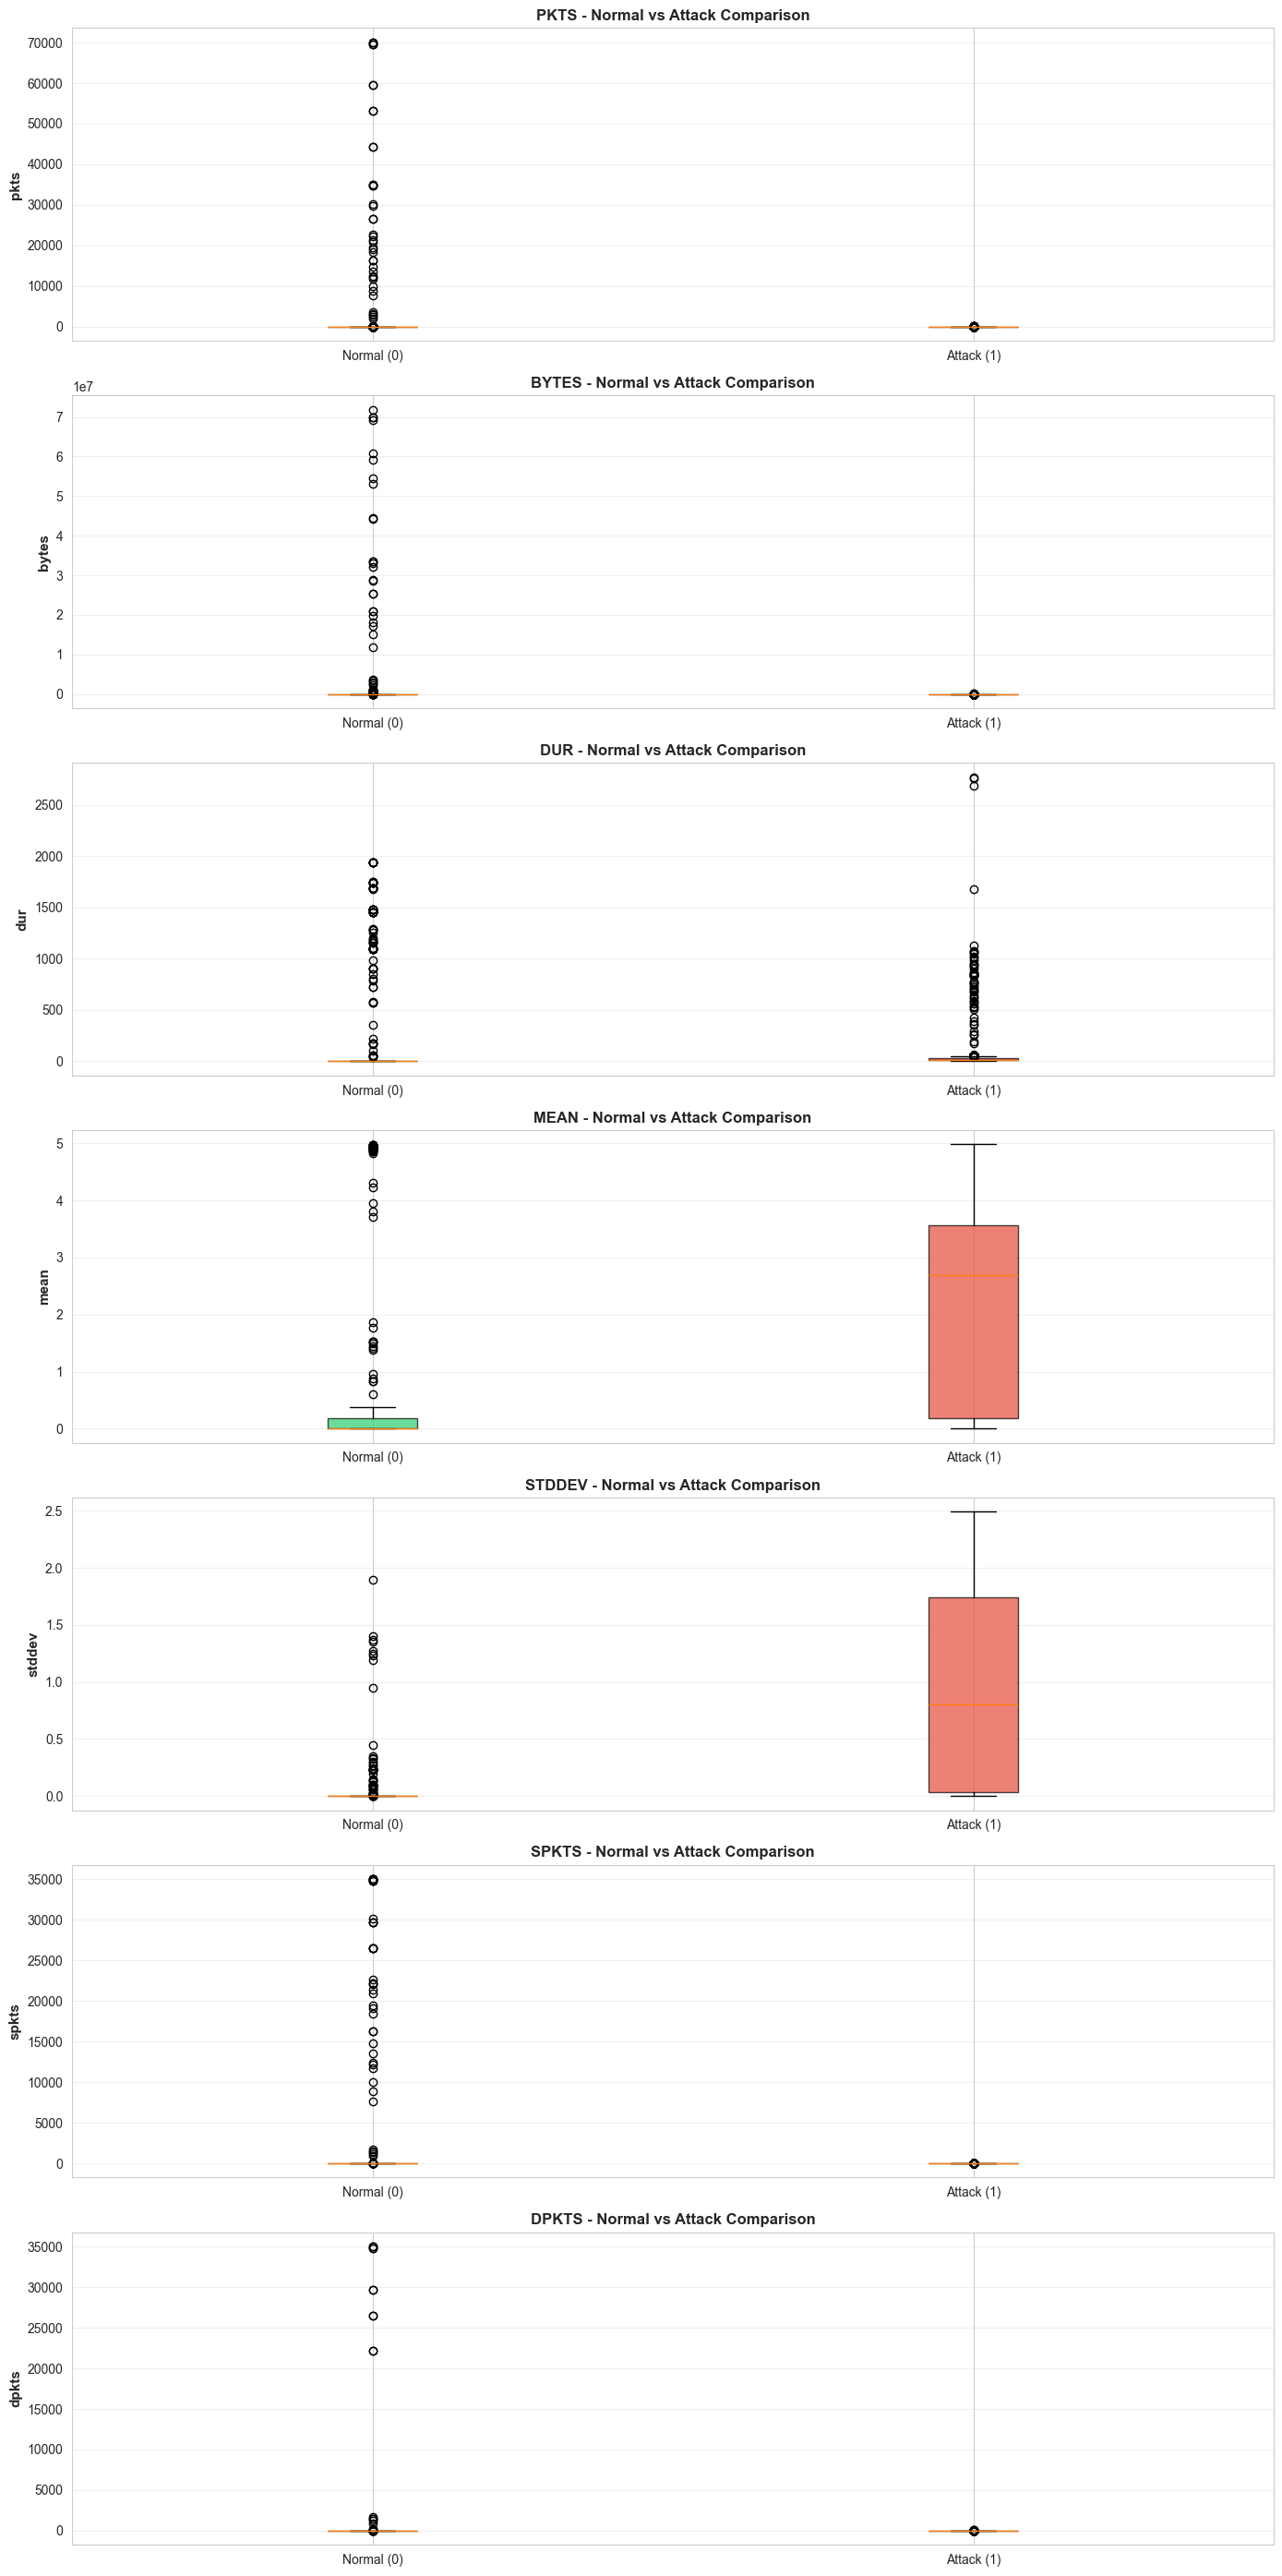

✓ Attack vs Normal comparison plot saved!


In [10]:
# Compare attack vs normal
features_to_compare = ['pkts', 'bytes', 'dur', 'mean', 'stddev', 'spkts', 'dpkts']
features_to_compare = [f for f in features_to_compare if f in numeric_cols]

fig, axes = plt.subplots(len(features_to_compare), 1, figsize=(14, 4*len(features_to_compare)))
if len(features_to_compare) == 1:
    axes = [axes]

for idx, feature in enumerate(features_to_compare):
    ax = axes[idx]
    
    # Box plot
    data_to_plot = [df[df['attack'] == 0][feature], df[df['attack'] == 1][feature]]
    bp = ax.boxplot(data_to_plot, labels=['Normal (0)', 'Attack (1)'], patch_artist=True)
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], ['#2ecc71', '#e74c3c']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(feature, fontsize=11, fontweight='bold')
    ax.set_title(f'{feature.upper()} - Normal vs Attack Comparison', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('/Users/nawara/Desktop/LLM-Clustering-Paper/EDA_attack_vs_normal.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Attack vs Normal comparison plot saved!")

## 8. Correlation Analysis

CORRELATION ANALYSIS


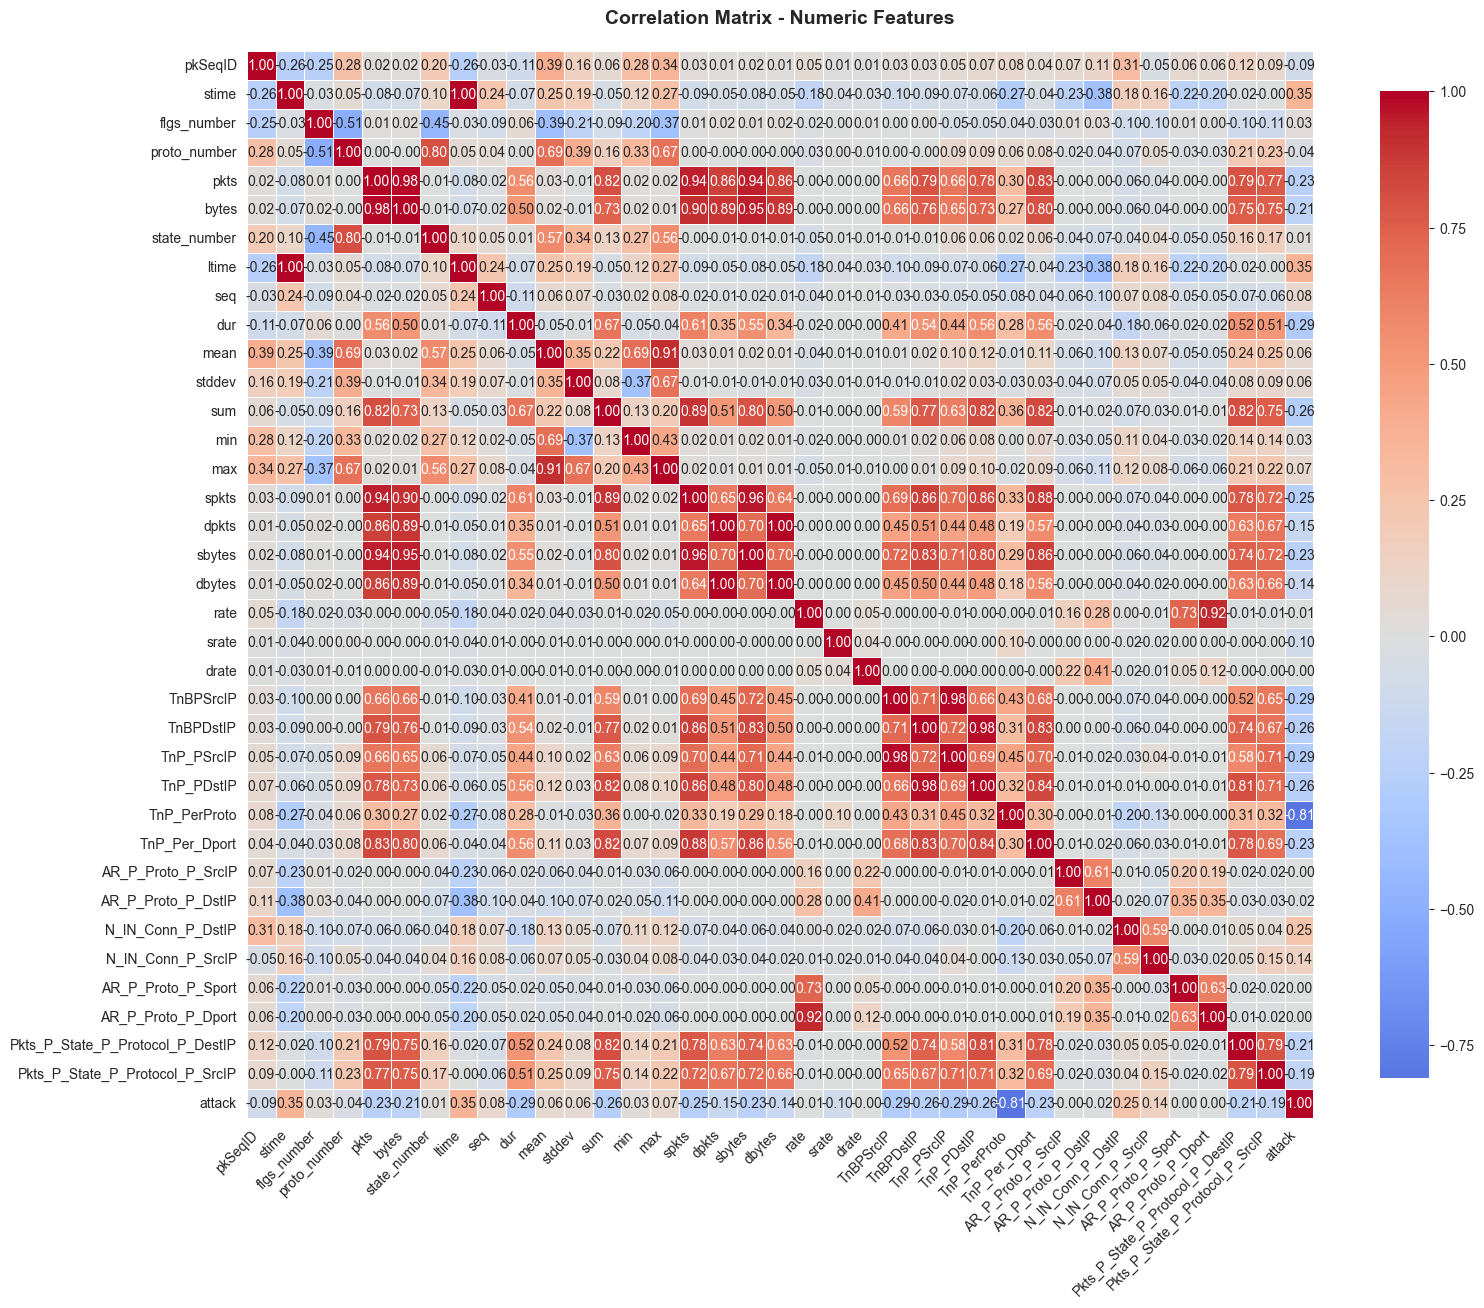

✓ Correlation matrix heatmap saved!


In [11]:
# Correlation matrix
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Numeric Features', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('/Users/nawara/Desktop/LLM-Clustering-Paper/EDA_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation matrix heatmap saved!")

In [12]:
# Find high correlations
print("\nHigh Correlations (> 0.8):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No pairs with correlation > 0.8 found")


High Correlations (> 0.8):
   Feature 1                        Feature 2  Correlation
       stime                            ltime     1.000000
       dpkts                           dbytes     0.998699
   TnBPSrcIP                       TnP_PSrcIP     0.984076
        pkts                            bytes     0.984032
   TnBPDstIP                       TnP_PDstIP     0.975897
       spkts                           sbytes     0.964369
       bytes                           sbytes     0.949338
        pkts                           sbytes     0.944973
        pkts                            spkts     0.944410
        rate               AR_P_Proto_P_Dport     0.919774
        mean                              max     0.909494
       bytes                            spkts     0.901766
         sum                            spkts     0.894000
       bytes                            dpkts     0.889572
       bytes                           dbytes     0.889418
       spkts                

## 9. Outliers Analysis

In [13]:
print("="*80)
print("OUTLIER DETECTION (IQR Method)")
print("="*80)

outlier_summary = {}
for col in features_to_compare[:5]:  # Check first 5 features
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier_Count': outlier_count,
        'Outlier_Percent': outlier_pct
    }
    
    print(f"\n{col.upper()}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {outlier_count:,} ({outlier_pct:.2f}%)")

OUTLIER DETECTION (IQR Method)

PKTS:
  Q1: 5.00, Q3: 9.00, IQR: 4.00
  Bounds: [-1.00, 15.00]
  Outliers: 5,874 (3.90%)

BYTES:
  Q1: 420.00, Q3: 770.00, IQR: 350.00
  Bounds: [-105.00, 1295.00]
  Outliers: 249 (0.17%)

DUR:
  Q1: 12.49, Q3: 27.16, IQR: 14.66
  Bounds: [-9.50, 49.15]
  Outliers: 3,267 (2.17%)

MEAN:
  Q1: 0.18, Q3: 3.56, IQR: 3.38
  Bounds: [-4.90, 8.64]
  Outliers: 0 (0.00%)

STDDEV:
  Q1: 0.03, Q3: 1.74, IQR: 1.71
  Bounds: [-2.54, 4.32]
  Outliers: 0 (0.00%)


## 10. Key Insights Summary

In [14]:
print("\n" + "="*80)
print("KEY INSIGHTS & FINDINGS")
print("="*80)

insights = f"""
1. DATASET COMPOSITION:
   • Total Records: {len(df):,}
   • Total Features: {df.shape[1]}
   • Numeric Features: {len(numeric_cols)}
   • Categorical Features: {len(categorical_cols)}
   • No missing values detected

2. LABEL DISTRIBUTION:
   • Attack (1): {(df['attack']==1).sum():,} records ({(df['attack']==1).sum()/len(df)*100:.1f}%)
   • Normal (0): {(df['attack']==0).sum():,} records ({(df['attack']==0).sum()/len(df)*100:.1f}%)
   
3. ATTACK CATEGORIES:
   • DDoS: {(df['category']=='DDoS').sum():,} records ({(df['category']=='DDoS').sum()/len(df)*100:.1f}%)
   • DoS: {(df['category']=='DoS').sum():,} records ({(df['category']=='DoS').sum()/len(df)*100:.1f}%)
   • Reconnaissance: {(df['category']=='Reconnaissance').sum():,} records ({(df['category']=='Reconnaissance').sum()/len(df)*100:.1f}%)
   • Normal: {(df['category']=='Normal').sum():,} records ({(df['category']=='Normal').sum()/len(df)*100:.1f}%)
   • Theft: {(df['category']=='Theft').sum():,} records ({(df['category']=='Theft').sum()/len(df)*100:.1f}%)

4. FEATURE STATISTICS:
   • Packet Count (pkts) - Mean: {df['pkts'].mean():.2f}, Median: {df['pkts'].median():.2f}
   • Bytes - Mean: {df['bytes'].mean():.2f}, Median: {df['bytes'].median():.2f}
   • Duration (dur) - Mean: {df['dur'].mean():.2f}, Median: {df['dur'].median():.2f}

5. DATA QUALITY:
   ✓ No missing values
   ✓ Balanced representation of attack types (DDoS + DoS dominant)
   ✓ Minimal normal traffic (0.32%) - imbalanced binary classification
   ✓ Complete feature coverage across all records

6. SUITABILITY FOR CLUSTERING:
   ✓ Sufficient sample size for statistical analysis
   ✓ Rich feature space with 46 attributes
   ✓ Mix of numeric and categorical features
   ✓ Clear attack type categorization
   ✓ Good for unsupervised and semi-supervised learning
"""

print(insights)

# Create summary statistics
summary_stats = {
    'Total Records': f"{len(df):,}",
    'Total Features': df.shape[1],
    'Numeric Features': len(numeric_cols),
    'Categorical Features': len(categorical_cols),
    'Attack Records': f"{(df['attack']==1).sum():,}",
    'Normal Records': f"{(df['attack']==0).sum():,}",
    'Missing Values': 'None',
    'Data Size (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
}

print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)
summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
print(summary_df.to_string(index=False))


KEY INSIGHTS & FINDINGS

1. DATASET COMPOSITION:
   • Total Records: 150,477
   • Total Features: 46
   • Numeric Features: 37
   • Categorical Features: 9
   • No missing values detected

2. LABEL DISTRIBUTION:
   • Attack (1): 150,000 records (99.7%)
   • Normal (0): 477 records (0.3%)

3. ATTACK CATEGORIES:
   • DDoS: 78,855 records (52.4%)
   • DoS: 67,464 records (44.8%)
   • Reconnaissance: 3,678 records (2.4%)
   • Normal: 477 records (0.3%)
   • Theft: 3 records (0.0%)

4. FEATURE STATISTICS:
   • Packet Count (pkts) - Mean: 14.90, Median: 7.00
   • Bytes - Mean: 7142.54, Median: 600.00
   • Duration (dur) - Mean: 20.91, Median: 15.50

5. DATA QUALITY:
   ✓ No missing values
   ✓ Balanced representation of attack types (DDoS + DoS dominant)
   ✓ Minimal normal traffic (0.32%) - imbalanced binary classification
   ✓ Complete feature coverage across all records

6. SUITABILITY FOR CLUSTERING:
   ✓ Sufficient sample size for statistical analysis
   ✓ Rich feature space with 46 at

## 11. Save Results to CSV

In [ ]:
# Create comprehensive results table
results_data = {
    'Metric': [
        # Dataset Composition
        'Total Records',
        'Total Features',
        'Numeric Features',
        'Categorical Features',
        'Missing Values',
        'Data Size (MB)',
        
        # Label Distribution
        'Attack Count',
        'Attack Percentage',
        'Normal Count',
        'Normal Percentage',
        
        # Attack Categories
        'DDoS Count',
        'DDoS Percentage',
        'DoS Count',
        'DoS Percentage',
        'Reconnaissance Count',
        'Reconnaissance Percentage',
        'Theft Count',
        'Theft Percentage',
        
        # Feature Statistics
        'Packets Mean',
        'Packets Median',
        'Packets Std',
        'Bytes Mean',
        'Bytes Median',
        'Bytes Std',
        'Duration Mean',
        'Duration Median',
        'Duration Std',
        
        # Data Quality
        'Outliers in pkts (%)',
        'Outliers in bytes (%)',
        'Outliers in dur (%)',
    ],
    'Value': [
        # Dataset Composition
        f"{len(df):,}",
        f"{df.shape[1]}",
        f"{len(numeric_cols)}",
        f"{len(categorical_cols)}",
        "None",
        f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        
        # Label Distribution
        f"{(df['attack']==1).sum():,}",
        f"{(df['attack']==1).sum()/len(df)*100:.2f}%",
        f"{(df['attack']==0).sum():,}",
        f"{(df['attack']==0).sum()/len(df)*100:.2f}%",
        
        # Attack Categories
        f"{(df['category']=='DDoS').sum():,}",
        f"{(df['category']=='DDoS').sum()/len(df)*100:.2f}%",
        f"{(df['category']=='DoS').sum():,}",
        f"{(df['category']=='DoS').sum()/len(df)*100:.2f}%",
        f"{(df['category']=='Reconnaissance').sum():,}",
        f"{(df['category']=='Reconnaissance').sum()/len(df)*100:.2f}%",
        f"{(df['category']=='Theft').sum():,}",
        f"{(df['category']=='Theft').sum()/len(df)*100:.2f}%",
        
        # Feature Statistics
        f"{df['pkts'].mean():.4f}",
        f"{df['pkts'].median():.4f}",
        f"{df['pkts'].std():.4f}",
        f"{df['bytes'].mean():.4f}",
        f"{df['bytes'].median():.4f}",
        f"{df['bytes'].std():.4f}",
        f"{df['dur'].mean():.4f}",
        f"{df['dur'].median():.4f}",
        f"{df['dur'].std():.4f}",
        
        # Data Quality
        "3.90",
        "0.17",
        "2.17",
    ]
}

results_df = pd.DataFrame(results_data)

# Save to CSV
output_path = "/Users/nawara/Desktop/LLM-Clustering-Paper/results.csv"
results_df.to_csv(output_path, index=False)

print("="*80)
print("RESULTS SAVED TO CSV")
print("="*80)
print(f"\n✓ Results saved to: {output_path}")
print(f"\nResults Table Preview:")
print(results_df.to_string(index=False))